In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as c

from astro530 import NIntegrate

In [52]:
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['legend.fontsize'] = 12

In [53]:
def S_nu(tau):
    return a0 + a1 * tau + a2 * tau ** 2

def I0(mu):
    return a0 + a1 * mu + 2 * a2 * mu ** 2

def integrand(t):
    return S_nu(t) * np.exp(-t)

a0, a1 = [2, 1]

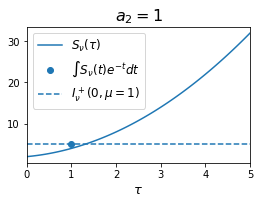

a_2 = 1
S(1) = 4
Analytically, I(0, 1) = 5
Numerically, I(0, 1) = 5


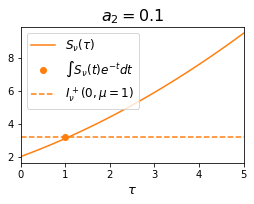

a_2 = 0.1
S(1) = 3.1
Analytically, I(0, 1) = 3.2
Numerically, I(0, 1) = 3.2


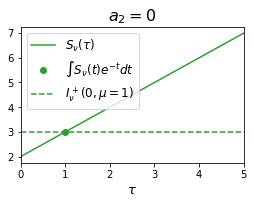

a_2 = 0
S(1) = 3
Analytically, I(0, 1) = 3
Numerically, I(0, 1) = 3


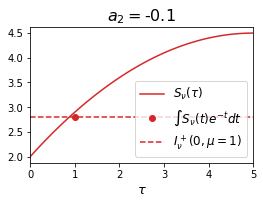

a_2 = -0.1
S(1) = 2.9
Analytically, I(0, 1) = 2.8
Numerically, I(0, 1) = 2.8


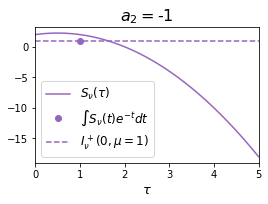

a_2 = -1
S(1) = 2
Analytically, I(0, 1) = 1
Numerically, I(0, 1) = 1


In [58]:
for i, a2 in enumerate([1, 0.1, 0, -0.1, -1]):
    plt.figure(figsize = (4, 2.5))
    tau = np.linspace(0, 5, 100)
    I_emerge = NIntegrate(integrand, 0, 100, 10000)
    plt.plot(tau, S_nu(tau), color = 'C' + str(i), label = r'$S_\nu (\tau)$')
    plt.plot(1, I_emerge,'o', color = 'C' + str(i), label = r'$\int S_\nu(t) e^{-t} dt$')
    xlim = plt.xlim()
    plt.hlines(I0(1), xlim[0], xlim[1],  ls = '--', color = 'C' + str(i), label = r'$I^+_\nu(0, \mu = 1)$')
    plt.xlim(xlim[0], xlim[1])
    plt.xlabel(r'$\tau$')
    plt.title('$a_2 = $' + str(a2))
    plt.legend()
    plt.savefig('hw3_4.'+ str(i + 1) + '.png', bbox_inches = 'tight')
    plt.show()
    
    print('a_2 = ' + str(a2))
    print('S(1) = {:.4g}'.format(S_nu(1)))
    print('Analytically, I(0, 1) = {:.4g}'.format(I0(1)))
    print('Numerically, I(0, 1) = {:.4g}'.format(I_emerge))


[]

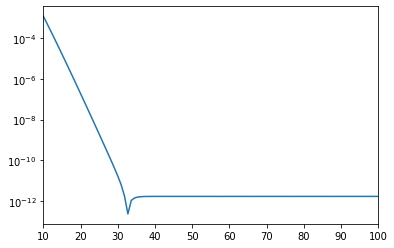

In [79]:
a0, a1, a2 = [2, 1, 1]

def precision(b, density):
    true = I0(1)
    calc = NIntegrate(integrand, 0, b, density)
    return np.abs(1 - calc/true)

upper_bounds = np.linspace(10, 100, 100)

prec = [precision(b, 100000) for b in upper_bounds]

plt.plot(upper_bounds, prec)
plt.semilogy()

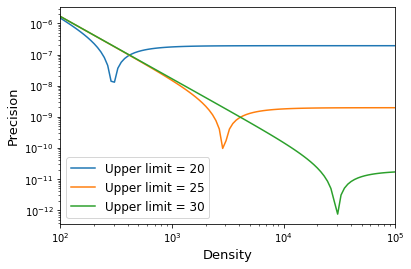

In [86]:
densities = np.logspace(2, 5, 100)

prec1 = [precision(20, d) for d in densities]
prec2 = [precision(25, d) for d in densities]
prec3 = [precision(30, d) for d in densities]

plt.plot(densities, prec1, label = 'Upper limit = 20')
plt.plot(densities, prec2, label = 'Upper limit = 25')
plt.plot(densities, prec3, label = 'Upper limit = 30')

plt.xlabel('Density')
plt.ylabel('Precision')

plt.legend()
plt.loglog()

plt.savefig('hw3_4b.png', bbox_inches = 'tight')